# Анализ данных сервиса аренды самокатов GoFast

**Описание проекта**

Вы аналитик популярного сервиса аренды самокатов GoFast.
Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.
Сервисом можно пользоваться:
- без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

**Описание данных**

В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — **users_go.csv**
- user_id	уникальный идентификатор пользователя
- name	имя пользователя
- age	возраст
- city	город
- subscription_type	тип подписки (free, ultra)

Поездки — **rides_go.csv**
- user_id	уникальный идентификатор пользователя
- distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date	дата совершения поездки

Подписки — **subscriptions_go.csv**
- subscription_type	тип подписки
- minute_price	стоимость одной минуты поездки по данной подписке
- start_ride_price	стоимость начала поездки
- subscription_fee	стоимость ежемесячного платежа

Задачи, поставленные в данном проекте:

Изучите общую информацию о каждом датафрейме.
Приведите столбец date к типу даты pandas.
Создайте новый столбец с номером месяца на основе столбца date.
Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

Опишите и визуализируйте общую информацию о пользователях и поездках:

частота встречаемости городов;
соотношение пользователей с подпиской и без подписки;
возраст пользователей;
расстояние, которое пользователь преодолел за одну поездку;
продолжительность поездок.

Объедините данные о пользователях, поездках и подписках в один датафрейм.
Создайте ещё два датафрейма из датафрейма, созданного на предыдущем этапе:
c данными о пользователях без подписки;
с данными о пользователях с подпиской.
Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из предыдущего шага: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь.

Проверить следующие гипотезы:
- тратят ли пользователи с подпиской больше времени на поездки?
- превышает ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку 3130 м?
- помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки?

Выполнить 2 задачи по биномиальному распределению

## Шаг 1. Загрузка данных

In [1]:
#сразу заберем нужные нам для проекта библиотеки и инструменты из них, как было рекомендовано в прошлом проекте

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import math
from scipy import stats as st
from math import factorial
from scipy.stats import binom
from scipy.stats import norm

### Общая информация о таблицах

<div class="alert alert-block" style="background-color: gainsboro">
<g>

<p>Откроем таблицу и изучим общую информацию о данных.

<p>Считаем данные из csv-файлов в датафреймы и сохраним в переменные.

<p>Выведем общую информацию о таблицах, чтобы понять с каким типом данных будем работать в каждом столбце методом info().

<p>Дополнительно проанализируем общие столбцы, по которым соединим все таблицы в одну для удобства анализа. </g>
</div>

In [2]:
data_users_go = pd.read_csv('/datasets/users_go.csv')
print(data_users_go.columns)
print('___________________________________')
print(data_users_go.info())
print('___________________________________')
print(data_users_go.isna().sum().sort_values(ascending=False))
print('___________________________________')
pd.set_option('display.max_columns', None)
data_users_go

Index(['user_id', 'name', 'age', 'city', 'subscription_type'], dtype='object')
___________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None
___________________________________
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
___________________________________


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


<div class="alert alert-block" style="background-color: gainsboro">
<g>Пропущенных значений в data_users_go нет.</g>
</div>

In [3]:
data_rides_go = pd.read_csv('/datasets/rides_go.csv')
print(data_rides_go.columns)
print('___________________________________')
print(data_rides_go.info())
print('___________________________________')
print(data_rides_go.isna().sum().sort_values(ascending=False))
print('___________________________________')
pd.set_option('display.max_columns', None)
data_rides_go

Index(['user_id', 'distance', 'duration', 'date'], dtype='object')
___________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None
___________________________________
user_id     0
distance    0
duration    0
date        0
dtype: int64
___________________________________


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


<div class="alert alert-block" style="background-color: gainsboro">
<g>В таблице rides_go.csv нет пропущенных значений.

В таблицах  rides_go.csv и users_go.csv есть общий столбец user_id.</g>
</div>

In [4]:
data_subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')
print(data_subscriptions_go.columns)
print('___________________________________')
print(data_subscriptions_go.info())
print('___________________________________')
print(data_subscriptions_go.isna().sum().sort_values(ascending=False))
print('___________________________________')
pd.set_option('display.max_columns', None)
data_subscriptions_go

Index(['subscription_type', 'minute_price', 'start_ride_price',
       'subscription_fee'],
      dtype='object')
___________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None
___________________________________
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64
___________________________________


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<div class="alert alert-block" style="background-color: gainsboro">
<g>В таблице data_subscriptions_go нет пропущенных значений.

В таблицах data_subscriptions_go и users_go.csv есть общий столбец subscription_type.
В таблицах data_subscriptions_go и data_rides_go.csv нет общих столбцов.</g>
</div>

### Таблица с пользователями

Более детально проанализируем значения из первой таблицы data_users_go.
Из столбцов 'user_id', 'name', 'age', 'city', 'subscription_type' в первую очередь нас интересуют столбцы, которые содержат: возраст и город.

#### Таблица с пользователями, данные о городе

In [5]:
print(data_users_go['city'].value_counts().sort_values())

Москва            172
Тюмень            185
Омск              186
Сочи              192
Краснодар         196
Ростов-на-Дону    202
Екатеринбург      206
Пятигорск         226
Name: city, dtype: int64


<div class="alert alert-block" style="background-color: gainsboro">
<g>Всего представлены данные по 8-ми городам.
Данных больше всего из Пятигорска и меньше всего из Москвы.</g>
</div>

#### Таблица с пользователями, данные о видах подписки

In [6]:
print(data_users_go['subscription_type'].value_counts().sort_values())

ultra    719
free     846
Name: subscription_type, dtype: int64


<div class="alert alert-block" style="background-color: gainsboro">
<g> Больше всего пользователей с типом подписки free, чуть меньше с видом подписки ultra  </g>
</div>

<div class="alert alert-block" style="background-color: gainsboro">
<g> Всего представлены данные по 8-ми городам.
Данных больше всего из Пятигорска и меньше всего из Москвы.
Больше всего пользователей в возрасте  от 23 до 27 лет.
Больше всего пользователей с типом подписки free, чуть меньше с видом подписки ultra
</g>
</div>

### Таблица с поездками

Более детально проанализируем значения из второй таблицы rides_go.
Из столбцов 'user_id', 'distance', 'duration', 'date' в первую очередь нас интересуют столбцы, которые содержат: длительность поездки и user_id.

#### Таблица с поездками данные о длительности

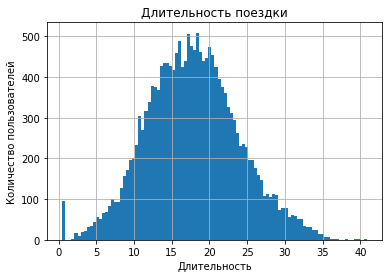

In [7]:
plt.hist(data_rides_go['duration'], bins = 100)
plt.title('Длительность поездки')
plt.xlabel('Длительность')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

<div class="alert alert-block" style="background-color: gainsboro">
<g> Видим, что есть пик длительности поездок у 0, распределение остальных значений близко к нормальному.
    Далее проанализируем пик около 0</g>
</div>

#### Таблица с поездками данные о user_id

Проверим есть ли у нас лидеры по количеству поездок, если да, то их нужно будет проанализировать отдельно

In [8]:
top_riders = data_rides_go['user_id'].value_counts().sort_values(ascending=False).head(15)
top_riders

1236    27
1063    26
783     26
1204    24
1149    23
716     23
1531    23
1030    23
1252    22
919     22
871     22
1361    22
1217    22
831     22
898     22
Name: user_id, dtype: int64

<div class="alert alert-block" style="background-color: gainsboro">
<g> Выдающихся пользователей нет, чье количество поездок было бы аномально высоким  </g>
</div>

### Таблица с подписками

Данные в таблице data_subscriptions_go довольно однообразные как мы увидели в пункте 1.1, детальный анализ проведем в третьем шаге Исследовательский анализ данных.

**Общий вывод по Шагу 1:**

<div class="alert alert-block" style="background-color: gainsboro">
<g> Есть пик длительности поездок у 0, распределение остальных значений близко к нормальному.
    Выдающихся пользователей нет, чье количество поездок было бы аномально высоким.
    Всего представлены данные по 8-ми городам.
Данных больше всего из Пятигорска и меньше всего из Москвы.
Больше всего пользователей в возрасте  от 23 до 27 лет.
Больше всего пользователей с типом подписки free, чуть меньше с видом подписки ultra
    </g>
</div>

## Шаг 2. Предобработка данных

Пропуски в таблицах отсуствуют как мы увидели в п.1.1.. Значит будем обрабатывать только типы значений в столбцах, а также поищем дубликаты.

### Изменение типа данных в столбце date

Приведем столбец date из таблицы data_riders к типу данных datatime.

In [9]:
data_rides_go['date'] = pd.to_datetime(data_rides_go['date'], format = '%Y-%m-%d')

In [10]:
#проверим работу
data_rides_go.info()

data_rides_go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


<div class="alert alert-block" style="background-color: gainsboro">
<g> Столбец date из таблицы data_riders приведен к типу данных datatime.  </g>
</div>

### Добавление новых столбцов years и month

Проверим за какие года представлены данные в таблице

In [11]:
data_rides_go['date'].dt.year.unique()

array([2021])

Данные указаны только за один год, значит добавление столбца с годом не потребуется.

Добавим столбец с месяцем

In [12]:
data_rides_go['month'] = data_rides_go['date'].dt.month
#добавим столбец с месяцем

In [13]:
data_rides_go['month'].unique()

array([ 1,  4,  8, 10, 11, 12,  3,  6,  7,  2,  5,  9])

<div class="alert alert-block" style="background-color: gainsboro">
<g> Столбец с месяцем использования самокатов - добавлен.  </g>
</div>

### Проверка дубликатов

Проверим дубликаты в каждой таблице

In [14]:
print(data_rides_go.duplicated().sum())
print('___________________________________')
print(data_subscriptions_go.duplicated().sum())
print('___________________________________')
print(data_users_go.duplicated().sum())

0
___________________________________
0
___________________________________
31


Теперь избавимся от выявленных дубликатов в таблице data_users_go

In [15]:
data_users_go.drop_duplicates(inplace=True)
print(data_users_go.duplicated().sum())

0


<div class="alert alert-block" style="background-color: gainsboro">
<g> Дубликаты из таблицы data_users_go удалены. В остальных двух - отсуствуют  </g>
</div>

**Общий вывод по Шагу 2:**

<div class="alert alert-block" style="background-color: gainsboro">
<g> Столбец date из таблицы data_riders приведен к типу данных datatime.
В таблицу data_rides_go добавлен столбец с месяцем.
Дубликаты из таблицы data_users_go удалены.
</g>
</div>

## Шаг 3. Исследовательский анализ данных

### Визуализация данных в таблице data_users_go по столбцу 'city'

Ранее мы уже смотрели распределение пользователей по городам, приведем эти данные в % соотношение в круговой диаграмме для наглядности.

In [16]:
"""для удобства создадим новый датафрейк,
который будет хранить в себе изначально данные о городах и количестве пользователей в них"""
data_city_count_users = data_users_go['city'].value_counts()

#добавим столбец с % соотношением пользователей по городам
data_city_count_users['rate'] = round(data_users_go['city'].value_counts() / data_city_count_users.sum(), 2) * 100
data_city_count_users['rate']

Пятигорск         14.0
Екатеринбург      13.0
Ростов-на-Дону    13.0
Краснодар         13.0
Сочи              12.0
Омск              12.0
Тюмень            12.0
Москва            11.0
Name: city, dtype: float64

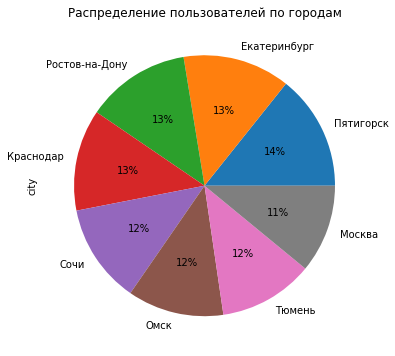

In [17]:
#создадим круговую диаграмму
data_users_go['city'].value_counts().plot(
    kind = 'pie', 
    y = data_city_count_users,
    autopct = '%1.0f%%',
    figsize=(6,6), 
    title = 'Распределение пользователей по городам');

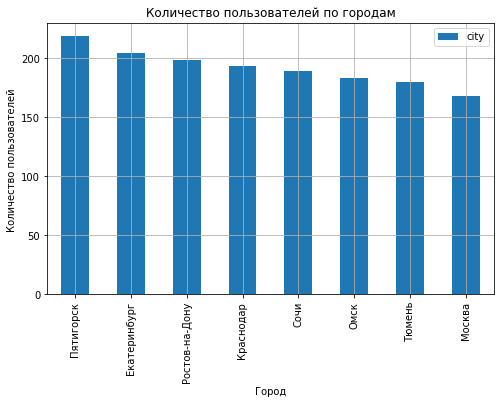

In [18]:
data_users_go['city'].value_counts().plot.bar(figsize=(8, 5), legend=True)
plt.title('Количество пользователей по городам')
plt.xlabel('Город')
plt.ylabel('Количество пользователей ')
plt.grid()
plt.show()

<div class="alert alert-block" style="background-color: gainsboro">
<g> Пользователи по городам распределены практически равномерно </g>
</div>

### Визуализация данных в таблице data_users_go по столбцу 'subscription_type'

Произведем аналогичные операции в столбце subscription_type

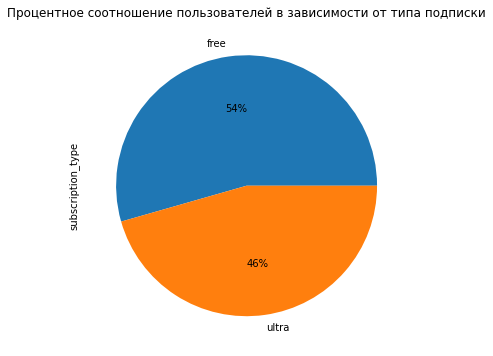

In [19]:
#выделим в отдельный датафрейм данные о количестве пользователей с разными типами подписки
data_users_count_subscription = data_users_go['subscription_type'].value_counts()

data_users_go['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = data_users_count_subscription, 
    autopct = '%1.0f%%', 
    figsize=(6,6),
    title = 'Процентное соотношение пользователей в зависимости от типа подписки');


<div class="alert alert-block" style="background-color: gainsboro">
<g> Пользователей с тарифом Free 54%, а с тарифом Ultra 46% </g>
</div>

### Визуализация данных в таблице data_users_go по столбцу 'age'

Так как возрастов может быть довольно много, более наглядно их отобразить в виде диаграммы, которая нам их автоматически сгруппирует.
Потроим гистограмму распределения по возрастам

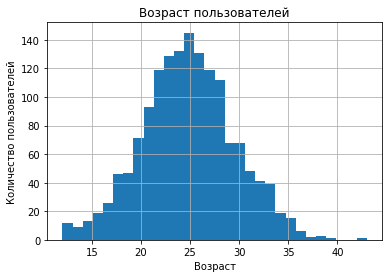

In [20]:
plt.hist(data_users_go['age'], bins = 30)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [21]:
count_users_by_age = data_users_go['age'].value_counts()
count_users_by_age.head(15)

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
Name: age, dtype: int64

<div class="alert alert-block" style="background-color: gainsboro">
<g> Больше всего пользователей в возрасте  от 23 до 27 лет. </g>
</div>

### Визуализация данных в таблице data_rides_go по столбцу 'distance'

In [22]:
#округлим значения, представленные в таблице
round(data_rides_go['distance'].sort_values(), 1).head(10)

11555     0.9
9541      2.6
13690     4.3
8658      6.8
7841      7.1
8906     11.3
8324     12.2
13940    15.0
15626    15.4
11862    15.6
Name: distance, dtype: float64

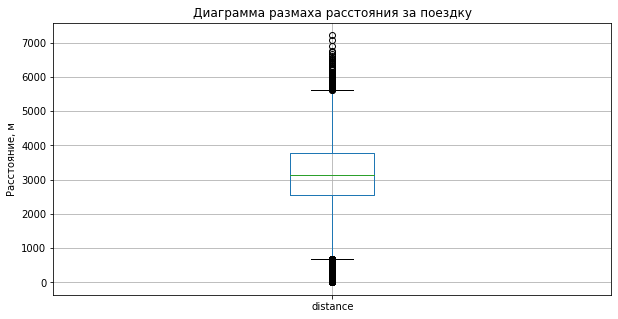

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [23]:
#создадим диаграмму размаха для столбца distance

data_rides_go.boxplot(column=['distance'], figsize=(10,5), grid=True)
plt.ylabel('Расстояние, м')
plt.title('Диаграмма размаха расстояния за поездку')
plt.show()

#выведем описание диаграммы
data_rides_go['distance'].describe()

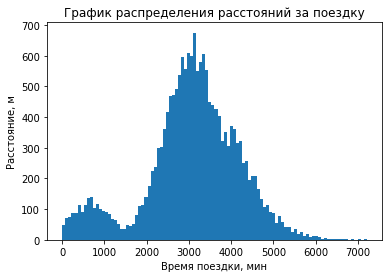

<Figure size 1440x2160 with 0 Axes>

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [24]:
plt.hist(data_rides_go['distance'], bins=100)
plt.title('График распределения расстояний за поездку')
plt.xlabel('Время поездки, мин')
plt.ylabel('Расстояние, м')
plt.figure(figsize=(20,30))
plt.show()

#выведем описание диаграммы
data_rides_go['distance'].describe()

<div class="alert alert-block" style="background-color: gainsboro">
<g> Из представленных данных без отсечений можно сделать следующие выводы:
Пользователи в среднем за одну поездку преодолевают 3,1 км.
Максимально пользователем было преодолено 7.21 км, минимально 0,85 км. 
75% пользователей преодолевают расстояние до 3,77 </g>
</div>

### Визуализация данных в таблице data_rides_go по столбцу 'duration'

In [25]:
#округлим значения, представленные в таблице
round(data_rides_go['duration'].sort_values(ascending=False), 2)

4215     40.82
4709     39.87
2623     39.53
1998     38.35
6453     38.27
         ...  
6768      0.50
7883      0.50
16179     0.50
9497      0.50
16704     0.50
Name: duration, Length: 18068, dtype: float64

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

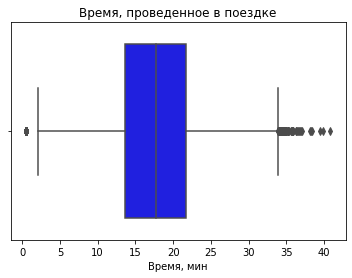

In [26]:
#создадим диаграмму размаха для столбца distance

sns.boxplot(x = data_rides_go['duration'], color='blue')
plt.title('Время, проведенное в поездке')
plt.xlabel('Время, мин')

#выведем описание диаграммы
data_rides_go['duration'].describe()

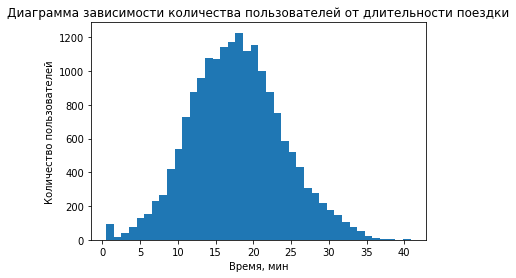

In [27]:
plt.hist(data_rides_go['duration'], bins = 40)
plt.title('Диаграмма зависимости количества пользователей от длительности поездки')
plt.xlabel('Время, мин')
plt.ylabel('Количество пользователей')
plt.show()

<div class="alert alert-block" style="background-color: gainsboro">
<g> В среднем пользователи используют самокат 17,8 мин.
Максимально 40 минут. И минимально ровно 0.5 мин.  т.е. 30 секунд, скорее всего это связано с тем, что каждому пользователю дается 30 секунд на проверку самоката и замену при необходимости. В дальнейшем такие поездки мы исключим из анализа

</g>
</div>

**Общий вывод по Шагу 3:**

<div class="alert alert-block" style="background-color: gainsboro">
<g> Пользователи по городам в выборке распределены практически равномерно.
    Пользователей с тарифом Free 54%, а с тарифом Ultra 46%.
    Больше всего пользователей в возрасте  от 23 до 27 лет.
    В среднем за одну поездку люди преодолевают 3,1 км. Максимально пользователем было преодолено 7.21 км, минимально 0,85 км.
    В среднем пользователи используют самокат 17,8 мин.
    Максимально 40 минут.
</g>
</div>

## Шаг 4. Объединение данных

### Объединение данных в одну таблицу

Объединим данные о пользователях, поездках и подписках в один датафрейм методом merge

In [28]:
#не знаю как сделать это в один шаг, поэтому сделала в несколько
good_data = data_users_go.merge(data_rides_go)
good_data = good_data.merge(data_subscriptions_go)
good_data.shape

(18068, 12)

In [29]:
pd.set_option('display.max_columns', None)
good_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [30]:
#проверим пропуски в новом датафрейме
good_data.isnull().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [31]:
#удалим неуспешные поездки - т.е. те, которые продлились менее 30 секунд
#good_data.drop(good_data[good_data['duration'] <= 0.5].index, inplace = True)

In [32]:
#ch_shape = 1 - 17973 / 18068
#ch_shape

Разделим наш получившийся сводный дата фрейм на два: с типом подписки free и с типом подписки ultra.
И проанализируем данные из этих датафреймов отдельно исходя из задания проекта:
Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

In [33]:
good_data_free = good_data.query("`subscription_type` == 'free'")
good_data_ultra = good_data.query("`subscription_type` == 'ultra'")

### Визуализация данных о пользователях с типом подписки free

#### Визуализация данных о пользователях с типом подписки free по расстоянию

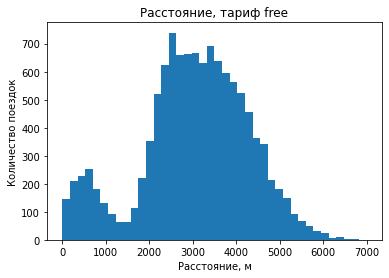

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [34]:
plt.hist(good_data_free['distance'], bins=40, range = (0, 7000))
plt.title('Расстояние, тариф free')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.show()

#выведем описание диаграммы
good_data_free['distance'].describe()

<div class="alert alert-block" style="background-color: gainsboro">
<g> В среднем с типом подписки free проезжают 3,1 км. 
    Большая часть пользователей используют самокат на расстояние 2,4 - 3,9 км</g>
</div>

#### Визуализация данных о пользователях с типом подписки free по времени поездки

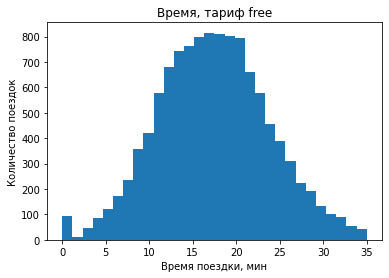

<Figure size 1440x1440 with 0 Axes>

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [35]:
plt.hist(good_data_free['duration'], bins=30, range = (0, 35))
plt.title('Время, тариф free')
plt.xlabel('Время поездки, мин')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

#выведем описание диаграммы
good_data_free['duration'].describe()

Да, так действительно легче делать выводы о двух выборках!

<div class="alert alert-block" style="background-color: gainsboro">
<g> В среднем с типом подписки free пользователи используют самокат 17,4 мин. 
    Большая часть пользователей используют самокат от 13-ти до 22-х минут </g>
</div>

### Визуализация данных о пользователях с типом подписки ultra

#### Визуализация данных о пользователях с типом подписки ultra по расстоянию

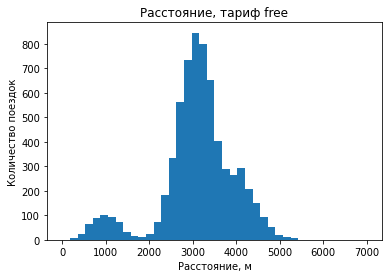

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [36]:
plt.hist(good_data_ultra['distance'], bins=40, range = (0, 7000))
plt.title('Расстояние, тариф free')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.show()

#выведем описание диаграммы
good_data_ultra['distance'].describe()

<div class="alert alert-block" style="background-color: gainsboro">
<g> В среднем с типом подписки ultra проезжают 3,15 км. 
    Есть два пиковых значения в диаграмме, значит можем предположить, что есть две группы пользователей:
    та, которая использует самокат на очень короткие расстояния до 1,5 км.
    и та, которая использует самокат на более длительные расстояния от 2,3-х до 5-ти км.
    Большая часть пользователей используют самокат на расстояние от 2,8 до 3,6 км.
    </g>
</div>

#### Визуализация данных о пользователях с типом подписки ultra по времени использования

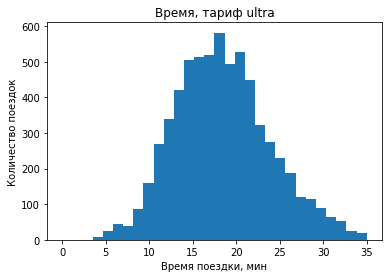

<Figure size 1440x1440 with 0 Axes>

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [37]:
plt.hist(good_data_ultra['duration'], bins=30, range = (0, 35))
plt.title('Время, тариф ultra')
plt.xlabel('Время поездки, мин')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

#выведем описание диаграммы
good_data_ultra['duration'].describe()

<div class="alert alert-block" style="background-color: gainsboro">
<g> В среднем с типом подписки ultra пользователи используют самокат 18,18 мин.
    Большая часть пользователей пользуются самокатом 14,5 - 21,9 мин </g>
</div>

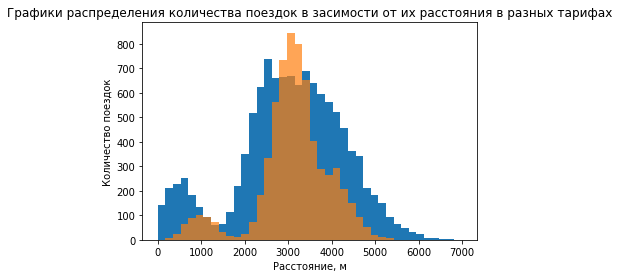

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [38]:
plt.hist(good_data_free['distance'], bins=40, range = (0, 7000))
plt.hist(good_data_ultra['distance'], bins=40, range = (0, 7000), alpha = 0.7)

plt.title('Графики распределения количества поездок в засимости от их расстояния в разных тарифах')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.show()

#выведем описание диаграммы
good_data_free['distance'].describe()

#выведем описание диаграммы
good_data_ultra['distance'].describe()

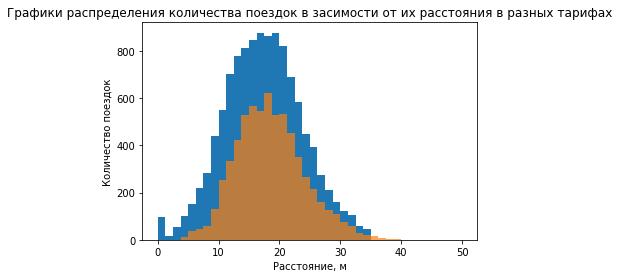

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [39]:
plt.hist(good_data_free['duration'], bins=40, range = (0, 50))
plt.hist(good_data_ultra['duration'], bins=40, range = (0, 50), alpha = 0.7)

plt.title('Графики распределения количества поездок в засимости от их расстояния в разных тарифах')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.show()

#выведем описание диаграммы
good_data_free['distance'].describe()

#выведем описание диаграммы
good_data_ultra['distance'].describe()

**Общий вывод по Шагу 4:**

<div class="alert alert-block" style="background-color: gainsboro">
<g> Для подписки типа free: в среднем с типом подписки free проезжают 3,11 км. В среднем с типом подписки free пользователи используют самокат 17,4 мин.Большая часть пользователей используют самокат от 13-ти до 22-х минут.
Для подписки типа ultra: В среднем с типом подписки ultra проезжают 3,15 км. В среднем с типом подписки ultra пользователи используют самокат 18,18 мин.Большая часть пользователейс типом подписки ultra  пользуются самокатом 14,5 - 21,9 мин
    
Сравнивая пользователей с разными типами подписок можно предположить, что: пользователи с типом подписки ultra, преодолевают незначительно, но бОльшие расстояния, чем с типом подписки free. Время использования самокатов практически идентично, но пользователи с типом подписки ultra незначительно, но длительнее используют самокат. </g>
</div>

## Шаг 5. Подсчёт выручки

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4 через сводную таблицу: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [40]:
#Добавлю значения переменных для каждого из тарифов:

#subscription_type = free
fee_free = 0 #абонентская плата
emp_free = 8 #стоимость каждой минуты использования
startpay_free = 50 #стоимость старта

#subscription_type = ultra
fee_ultra = 199 #абонентская плата
emp_ultra = 6 #стоимость каждой минуты использования
startpay_ultra = 0 #стоимость старта

In [41]:
#Округлим значения длительности поездки до ближайшего целого
good_data['duration'] = np.ceil(good_data['duration'])

In [42]:
total_data = pd.pivot_table(good_data, index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 'duration' : sum, 'name' : len, 'subscription_type' : min})

#если будет возможность, то мне было бы интересно узнать как вернее было бы определить для столбцов с булевым значением,
#которое может меняться в зависимости от месяца использования

In [43]:
total_data.rename(columns = {'name' : 'count_name'}, inplace = True)

In [44]:
#выведем получившиеся данные в таблице в зависимости от месяца использования
total_data.sort_values(by='month').head(10)

distance  duration  count_name subscription_type
month user_id                                                      
1     1         7027.511294      42.0           2             ultra
      1061     12637.249630      43.0           3              free
      1063      3276.362299      10.0           1              free
      1064      5297.324649      15.0           1              free
      1065     14547.099333      99.0           4              free
      1066      2809.064949      19.0           1              free
      1067      3864.900780      22.0           1              free
      1069      7007.076943      53.0           3              free
      1071      3635.094136      15.0           1              free
      1072      2498.615999      11.0           1              free

In [45]:
#добавим столбец с ежемесячной выручкой по типам тарифа:

def revenue(row):
    if row['subscription_type'] == 'ultra':
        return emp_ultra * row['duration'] + fee_ultra
    elif row['subscription_type'] == 'free':
        return emp_free * row['duration'] + startpay_free * row['count_name']
    else:
        return 'Not subscription type'
    

total_data['revenue_per_month'] = total_data.apply(revenue, axis=1)
total_data.head()

distance  duration  count_name subscription_type  \
month user_id                                                        
1     1        7027.511294      42.0           2             ultra   
      3        3061.777147      13.0           1             ultra   
      5        3914.646990      13.0           1             ultra   
      7        6478.080979      28.0           2             ultra   
      12       3577.151148      33.0           1             ultra   

               revenue_per_month  
month user_id                     
1     1                    451.0  
      3                    277.0  
      5                    277.0  
      7                    367.0  
      12                   397.0

**Общий вывод по Шагу 5:**

<div class="alert alert-block" style="background-color: gainsboro">
<g> Мы нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавили столбец с помесячной выручкой, которую принес каждый пользователь. </g>
</div>

## Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов, которые мы проанализируем с помощью проверок нескольких гипотез:

- тратят ли пользователи с подпиской больше времени на поездки?
- превышает ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку 3130 м?
- помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки?

### Проверка гипотезы: тратят ли пользователи с подпиской больше времени на поездки?

Проверим гипотезу: пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе.
- За нулевую гипотезу возьмем: время использования самоката с типом подписки ultra равно времени использования самоката с типом подписки free
- За альтернативную гипотезу возьмем: время использования самоката с типом подписки ultra больше времени использования самоката с типом подписки free

In [46]:
ultra = good_data_ultra['duration'] 
free = good_data_free['duration']
results = st.ttest_ind(ultra, free, alternative = 'greater')
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

good_data_free_mean=good_data_free['duration'].mean().round(2)
good_data_ultra_mean=good_data_ultra['duration'].mean().round(2)    
print(f'среднее значение для столбца с длительностью поездки в тарифом free = {good_data_free_mean}')
print(f'среднее значение для столбца с длительностью поездки в тарифом ultra = {good_data_ultra_mean}')

1.2804098316645618e-34
Отвергаем нулевую гипотезу
среднее значение для столбца с длительностью поездки в тарифом free = 17.39
среднее значение для столбца с длительностью поездки в тарифом ultra = 18.54


### Проверка гипотезы: превышает ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку 3130 м?


Проверим гипотезу: превышает ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку 3130 м.?
- За нулевую гипотезу возьмем: расстояние на подписке ultra = 3130 м.
- За альтернативную гипотезу возьмем: расстояние на подписке ultra меньше 3130 м.

In [47]:
#создадим датафрейс с расстоянием для пользователей с подпиской типа ultra
data_ultra_dist = good_data_ultra['distance']

hipo_value = 3130.0
alpha = 0.05

results = st.ttest_1samp(data_ultra_dist, hipo_value, alternative='greater')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')


data_ultra_dist_mean = good_data_ultra['distance'].mean().round(2)

print(f'среднее значение для столбца с расстоянием одной поездки в тарифом ultra = {data_ultra_dist_mean}')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу
среднее значение для столбца с расстоянием одной поездки в тарифом ultra = 3115.45


### Проверка гипотезы: помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки?

Важно понять, тратят ли пользователи с подпиской больше времени на поездки?
Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим эту гипотезу.
- За нулевую гипотезу возьмем: выручка пользователей за месяц на подписке ultra равна выручке за месяц пользователей на подписке free
- За альтернативную гипотезу возьмем: выручка пользователей за месяц на подписке ultra больше выручки за месяц пользователей на подписке free

In [48]:
#создадим датафрейс с выручкой за месяц для пользователей с подпиской типа ultra
data_ultra_per_month = total_data.loc[total_data['subscription_type'] == 'ultra', 'revenue_per_month']
                        
#создадим датафрейс с выручкой за месяц для пользователей с подпиской типа free
data_free_per_month = total_data.loc[total_data['subscription_type'] == 'free', 'revenue_per_month'] 


results = st.ttest_ind(data_ultra_per_month, data_free_per_month, alternative = 'greater')
alpha = 0.05
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


In [49]:
mean_free = data_free_per_month.mean().round(2)
mean_ultra = data_ultra_per_month.mean().round(2)

print("Средняя выручка в месяц для пользователей с подпиской типа free:", mean_free)
print("Средняя выручка в месяц для пользователей с подпиской типа ultra:", mean_ultra)

Средняя выручка в месяц для пользователей с подпиской типа free: 328.64
Средняя выручка в месяц для пользователей с подпиской типа ultra: 362.79


### Проверка гипотезы: снизилось ли количество обращений в тех поддержку после обновления сервера

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.

Так как у нас будут выборки с данными, которые зависят от факта - обновления сервера, предположу, что здесь стоит применить гипотезу о равенстве средних значения количество обращений в техподдержку до и после изменения для парных выборок.

- За нулевую гипотезу возьмем: Среднее из первой выборке равно среднему из второй выборки
- За альтернативную: Среднее из первой выборке не равно среднему из второй выборки

Для этого нужно будет использовать метод scipy.stats.ttest_rel()

**Общий вывод по Шагу 6:**

<div class="alert alert-block" style="background-color: gainsboro">
<g> Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе. Отвергли нулевую гипотезу
Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку. Не удалось отвергнуть нулевую гипотезу
Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. Отвергли нулевую гипотезу.
    Для проверки гипотезы о снижении количества обращений необходимо будет нужно использовать метод scipy.stats.ttest_rel()
    </g>
</div>

## Шаг 7. Распределения

### Задача 1 по биномиальному распределению

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Биномиальное распределение описывает вероятность успеха в серии независимых бинарных экспериментов. В данном случае мы хотим определить количество клиентов, продлевших подписку после бесплатного периода, при заданном условии, что вероятность продления подписки равна 10%. 
 
Чтобы определить минимальное количество промокодов, нам нужно найти значение параметра N (количество промокодов), при котором вероятность не выполнить план (менее 100 клиентов продлевают подписку) составляет около 5%. 
 
Значит, стоить построить график распределения с использованием различных значений параметра N и найти такое значение, при котором вероятность опережения не выполнения плана составляет около 5%.

In [50]:
#Определим параметры биномиального распределения

#вероятность успешного продления подписки
p = 0.1
#количество продлений подписки
k = 100

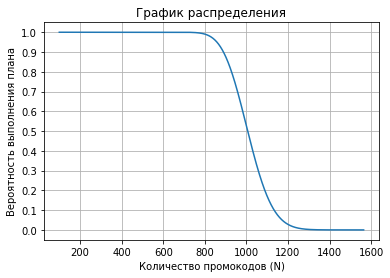

In [51]:
"""Построим график распределения с использованием значений параметра N в диапазоне от 100 до 1565
(возьму за максимальное значение общее количество строк в изначальной таблице)"""

N_values = range(100, 1565) 
#взяла за максимальное значение количество строк в изначальной таблице
cdf_values = [st.binom.cdf(k, N, p) for N in N_values] 

plt.plot(N_values, cdf_values) 
plt.yticks(np.arange(min(cdf_values), max(cdf_values)+0.1, 0.1))

plt.xlabel('Количество промокодов (N)')
plt.ylabel('Вероятность выполнения плана') 
plt.title('График распределения')
plt.grid(b=True)

plt.show() 

По графику можно предположить, что количество промокодов, которые необходимо разослать примерно равно 1000.

Найдем более точное значение параметра N, при котором вероятность не выполнить план (менее 100 продлений подписки) составляет около 5%.
Я нашла метод np.abs() для нахождения ближайшего значения к 0.05 (5%) и функции np.argmin(), которая возвращает массив, содержащий индексы минимальных элементов.

In [52]:
N_value = N_values[np.abs(np.array(cdf_values) - 0.05).argmin()] 
print("Минимальное количество промокодов для отправки = ", N_value) 

Минимальное количество промокодов для отправки =  1172


<div class="alert alert-block" style="background-color: gainsboro">
<g> Минимальное количество промокодов, которые требуется разослать, чтобы вероятность не выполнить план по продлению подписки составляла примерно 5% =  1172 </g>
</div>

### Задача 2 по биномиальному распределению

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Нам необходимо определить количество клиентов, которые откроют уведомление после разосланных 1 млн уведомлений, при условии, что вероятность открытия равна 0.4 (40% открывают уведомления).

In [53]:
#определим параметры нормального распределения

# количество разосланных уведомлений
n = 1000000

# вероятность открытия уведомление
p = 0.4

In [54]:
#вычислим среднее значение и стандартное отклонение нормального распределения
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

print('mu =',mu)
print('sigma =',sigma)

mu = 400000.0
sigma = 489.89794855663564


In [55]:
#оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей
p_hipo = st.norm.cdf(399500, mu, sigma)
p_hipo = "{:.2%}".format(p_hipo)

print("Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей:", p_hipo)

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: 15.37%


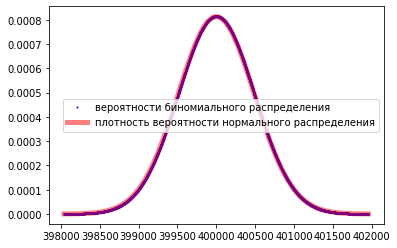

Условие выполняется


In [56]:
n = 1000000
p = 0.4

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * np.sqrt(n * p * (1 - p)))
right = int(n * p + 4 * np.sqrt(n * p * (1 - p)))

# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()

# используем синие о-образные маркеры и размер маркера 1
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=1, label='вероятности биномиального распределения')

# зададим параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения:
# получим список из 50 чисел от left до right
x = np.linspace(left, right, 50)
# используем красную линию ширины 3 и прозрачности 0.3
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=5, alpha=0.5, label='плотность вероятности нормального распределения')
 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
# x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1))
# ax.set_xticks(x_ticks)

# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.show()

# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие выполняется')
else:
    print('Условие не выполняется')

In [57]:
#не нашла способа, чтобы уменьшить количество значений для xticks.
#Буду признательна, если будет возможность подсказать.
#Тот метод, что использовала раньше почему-то для данного графика не подходит.

<div class="alert alert-block" style="background-color: gainsboro">
<g>Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: 15.37% </g>
</div>

# Общий вывод по проекту

<div class="alert alert-block" style="background-color: gainsboro">
<g> 
    <p>Всего в выборке представлены данные по 8-ми городам. Данных больше всего из Пятигорска и меньше всего из Москвы,
но в целом пользователи по городам распределены практически равномерно. Пользователей с тарифом Free 54%, а с тарифом Ultra 46%. Основаная аудитория - от 23 до 27 лет. В среднем за одну поездку люди преодолевают 3,1 км и используют самокат 17,8 мин.
    
<p> Для анализа данных были совершены следующие действия с исходной таблицей:
    удалены дубликаты, добавлены необходимые для анализа столбцы, а имеющиеся для анализа данные приведены к нужному формату.

<p>Для подписки типа free: в среднем с типом подписки free проезжают 3,11 км.
Для подписки типа ultra: В среднем с типом подписки ultra проезжают 3,15 км.
В среднем с типом подписки free пользователи используют самокат 17,4 мин.
В среднем с типом подписки ultra пользователи используют самокат 18,18 мин.
    
<p>Пользователи с типом подписки ultra, преодолевают незначительно, но бОльшие расстояния, чем с типом подписки free. Время использования самокатов практически идентично, но пользователи с типом подписки ultra незначительно, но длительнее используют самокат. 
    
<p> В ходе проверки гипотез были получены следующие выводы:
    
Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе.
Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.
Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.
    
<p>По результатам выполнения задач, связанных с биномиальным распределением можно сделать следующие выводы:
Минимальное количество промокодов, которые требуется разослать, чтобы вероятность не выполнить план по продлению подписки составляла примерно 5% = 1172. Вероятность того, что push-уведомления в мобильном приложении откроют не более 399,5 тыс. пользователей = 15.37% </g>
</div>
    